# MEDIUM ERR VS TEMP EXTRACTED


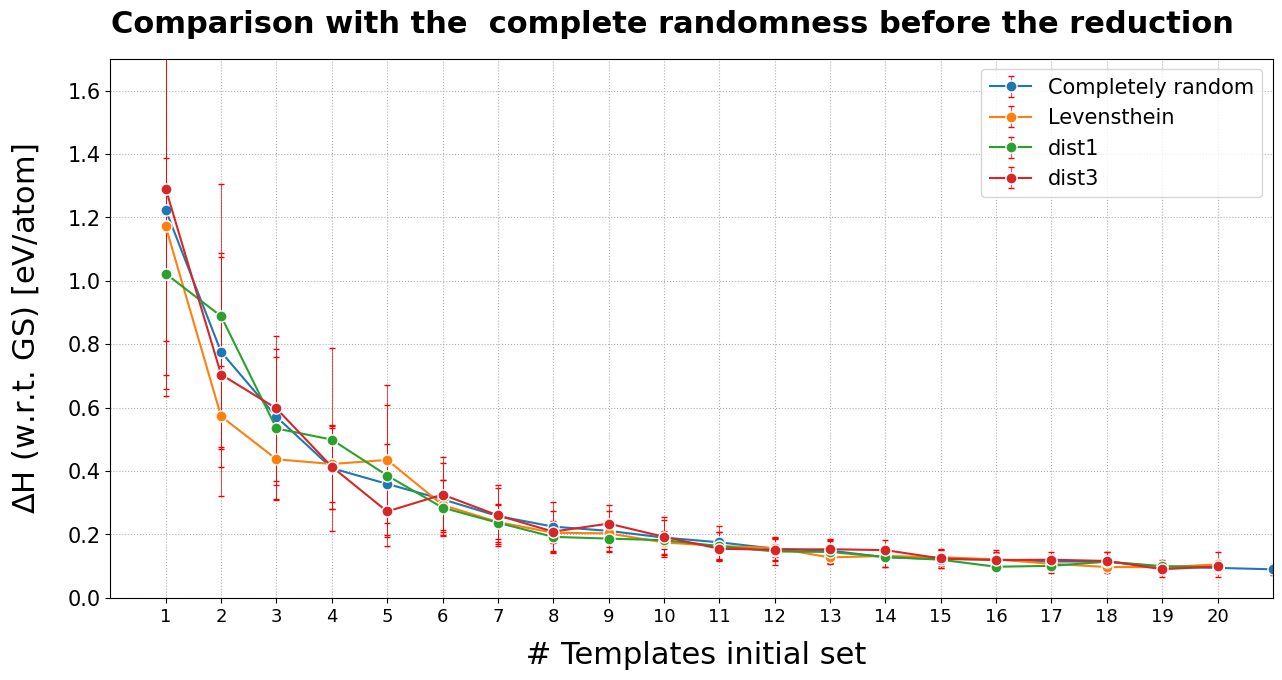

In [9]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mother_dir = './'


dir_name_list = ['RANDOM/FULL50sets/', 'DIFFERENT_DISTANCES/levensthein_distance', 'DIFFERENT_DISTANCES/dist1' ,'DIFFERENT_DISTANCES/dist3']
label_list = ['Completely random', 'Levensthein', 'dist1', 'dist3']


title = f'Comparison with the  complete randomness before the reduction'
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
fig.subplots_adjust(hspace=0.0)
fig.suptitle(title, fontsize=22, y=0.95, fontweight='bold') 



for dir_name in dir_name_list:
    color_idx = dir_name_list.index(dir_name)
    if color_idx == 0:
        df_tot = pd.read_csv(mother_dir + f'{dir_name}/ErrBefore.csv', header=None, na_filter=False)
        tot = (df_tot.to_numpy())
    else:
        df_tot = pd.read_csv(mother_dir + f'{dir_name}/TotalStatics.csv', header=None, na_filter=False, index_col = 0)
        tot = (df_tot.to_numpy()).T

    x = np.arange(1, len(tot[0])+1) 
    ax.errorbar(x, tot[0], yerr=tot[1], ecolor='red', elinewidth=0.5, capsize=2, marker = 'o', markeredgecolor='white', markersize=8, label=label_list[color_idx])

ax.set_ylabel(r'$\Delta$H (w.r.t. GS) [eV/atom]', fontsize=22)
ax.yaxis.set_label_coords(-0.06, 0.5)

step = 0.2
y_ticks  = np.arange(0.0,1.7,step, dtype=float)
y_ticks = np.round(y_ticks, decimals=1)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=15)
ax.grid(True, ls=':')
ax.set_ylim(0,1.7)

ax.set_xlabel(' # Templates initial set', fontsize=22)
ax.xaxis.set_label_coords(0.5, -0.08)

xticks = np.arange(1,21, 1)
xticks = np.round(xticks, decimals=0) 
ax.set_xlim(0,21)
ax.set_xticks(xticks)
#ax.set_xlim(0,20.5)
ax.set_xticklabels(xticks, fontsize=13, rotation=0)

ax.legend(loc='upper right', fontsize=15)

fig.savefig(f"{title.replace(' ', '_')}.png", dpi=300)

In [ ]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mother_dir = './'
dir_name_list = ['CLUSTERS/CLUSTER METHOD', 'RANDOM/FULL20sets']
label_list = ['Cluster Method', 'Random Extraction']

title = f'Threshold for Reduction = 0.9 and Comparative Pairs = 105'
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
fig.subplots_adjust(hspace=0.0)
fig.suptitle(title, fontsize=22, y=0.95)



for dir_name in dir_name_list:
    color_idx = dir_name_list.index(dir_name)
    color = ['blue', 'green', 'red', 'pink'][color_idx]
    df_numtemp = pd.read_csv(mother_dir + f'{dir_name}/NumberTempRedu.csv', header=None, na_filter = False, index_col = 0)
    numtemp = df_numtemp.to_numpy()

    x = np.arange(1, len(numtemp[0])+1) 
    toremove = []
    for idx, i in enumerate(numtemp[0]):
        if i < 0.0001:
            toremove.append(idx)

    x = np.delete(x, toremove)
    numtemp = np.delete(numtemp, toremove, axis=1)

    ax.errorbar(x[:36], numtemp[0][:36], yerr=numtemp[1][:36], color = color , ecolor='red', elinewidth=0.5, capsize=2, marker = 'o', markeredgecolor='white', markersize=8, label=label_list[color_idx])

ax.set_ylabel(' # Templates final set', fontsize=22)
ax.yaxis.set_label_coords(-0.06, 0.5)

step = 2
y_ticks  = np.arange(0,20,step, dtype=float)
y_ticks = np.round(y_ticks, decimals=0)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=15)
ax.grid(True, ls=':')
ax.set_ylim(0,15)

ax.set_xlabel(' # Templates initial set', fontsize=22)
ax.xaxis.set_label_coords(0.5, -0.08)

xticks = np.arange(1,58, 2)
xticks = np.round(xticks, decimals=0) 
ax.set_xticks(xticks)
ax.set_xlim(0,25)
ax.set_xticklabels(xticks, fontsize=13, rotation=0)

ax.legend(loc='upper right', fontsize=15)

fig.savefig('Ntemp_InTemp.png')

In [ ]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mother_dir = './'
dir_name_list = ['CLUSTERS/CLUSTER METHOD', 'RANDOM/FULL20sets']
label_list = ['Cluster Method', 'Random Extraction']

title = f'Threshold for Reduction = 0.9 and Comparative Pairs = 105'
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
fig.subplots_adjust(hspace=0.0)
fig.suptitle(title, fontsize=22, y=0.95)



for dir_name in dir_name_list:
    color_idx = dir_name_list.index(dir_name)
    color = ['blue', 'green', 'red', 'pink'][color_idx]
    df_tot = pd.read_csv(mother_dir + f'{dir_name}/TotalStatics.csv', header=None, na_filter=False, index_col = 0)
    tot = (df_tot.to_numpy()).T

    x = np.arange(1, len(tot[1])+1) 
    toremove = []
    for idx, i in enumerate(tot[1]):
        if i < 0.0001:
            toremove.append(idx)

    x = np.delete(x, toremove)
    tot = np.delete(tot, toremove, axis=1)

    ax.plot(x[:36], tot[1][:36], color = color , marker = 'o', markeredgecolor='white', markersize=8, label=label_list[color_idx])

ax.set_ylabel(r'$\sigma(\Delta$H) (w.r.t. GS) [eV/atom]', fontsize=22)
ax.yaxis.set_label_coords(-0.06, 0.5)

step = 0.1
y_ticks  = np.linspace(0,0.4,9)
y_ticks = np.round(y_ticks, decimals=2)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=15)
ax.grid(True, ls=':')
ax.set_ylim(0,0.4)

ax.set_xlabel(' # Templates initial set', fontsize=22)
ax.xaxis.set_label_coords(0.5, -0.08)

xticks = np.arange(1,58, 2)
xticks = np.round(xticks, decimals=0) 
ax.set_xticks(xticks)
ax.set_xlim(0,36)
ax.set_xticklabels(xticks, fontsize=13, rotation=0)

ax.legend(loc='upper right', fontsize=15)

plt.show()
fig.savefig('EnStd_InTemp.png')

# MEAN ERR vs NTEMP FINAL

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from template_csp import managetemp as mte
from tqdm import tqdm
import json

test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']

clusters = {}
with open('ClustersDict/Clusters8.json', 'r') as f:
    clusters = json.load(f)

hyperparameters = { 
    "weight_occurrence" : 1,
    "weight_sg" : 0.001,
    "weight_formation_entalphy" : 1, 
    "lev_red" : 0.9,
    "n_pairs" : 20,
    "comp" : 1
}

n_sets = 10
tot = np.zeros((5,57))
mother_dir = './FULL20sets/'

for lev_red in range(5, 10):
    hyperparameters['lev_red'] = lev_red/10
    for i in tqdm(range(1,58)):
        errors = []
        numtemp = []
        for j in range(n_sets):
            template_set = mte.TemplateSet(test_elements, mother_dir + str(i) + f'/TemplateSet_{j}')
            os.makedirs(f'PROVACLUSTER/{lev_red/10}/{i}', exist_ok=True)
            if lev_red/10 == 0.4:
                reduction_set = mte.generate_one_pairset(template_set, hyperparameters, test_elements, clusters)
            else:
                reduction_set = mte.PairSet(template_set, test_elements, f'PROVACLUSTER/0.5/{i}/Pairset_{j}')
            reduction_set.recap_relaxed(f'PROVACLUSTER/{lev_red/10}/{i}/Pairset_{j}')
            n_finale_temp = len(reduction_set.reduced_set(hyperparameters))
            error = reduction_set.total_error(hyperparameters)
            errors.append(error)
            numtemp.append(n_finale_temp)
        
        tot[0][int(i)-1] = np.array(errors).mean()
        tot[1][int(i)-1] = np.array(errors).std()
        tot[2][int(i)-1] = np.array(numtemp).mean()
        tot[3][int(i)-1] = np.array(numtemp).std()

        np.savetxt(f'TotalStatics{lev_red}.csv', tot, delimiter=',')

100%|██████████| 57/57 [01:04<00:00,  1.13s/it]


In [12]:
np.savetxt(f'TotalStatics.csv', tot, delimiter=',')

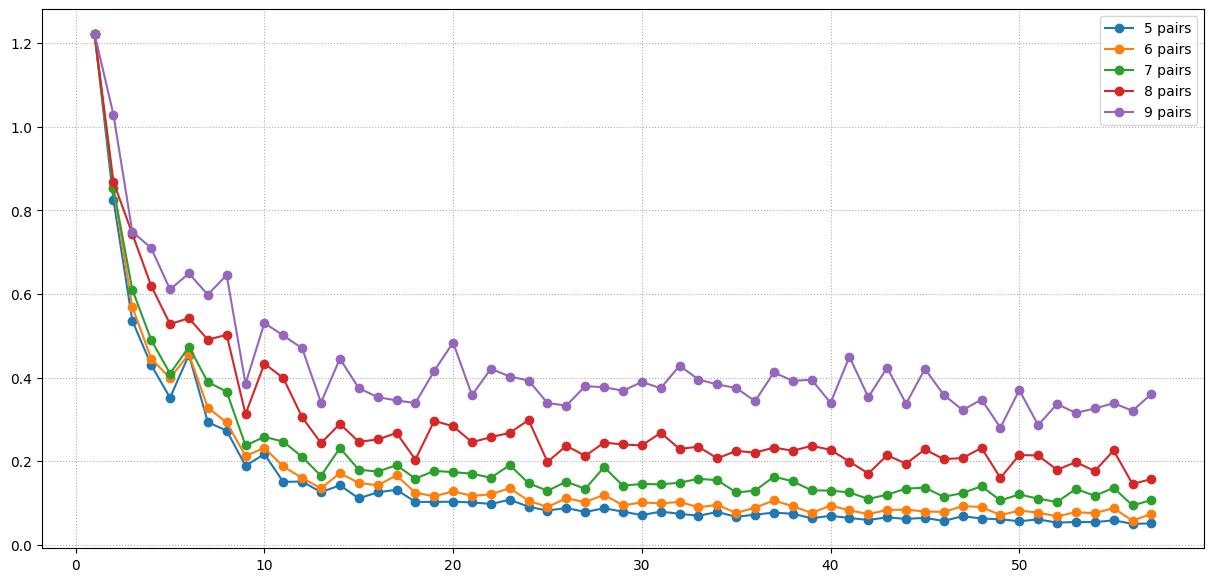

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

for i in range(5,10):
    tot = np.loadtxt(f'TotalStatics{i}.csv', delimiter=',')
    x = np.arange(1, len(tot[0])+1)
    ax.plot(x, tot[0], marker = 'o', label=f'{i} pairs')

ax.legend(loc='upper right')
ax.grid(True, ls=':')


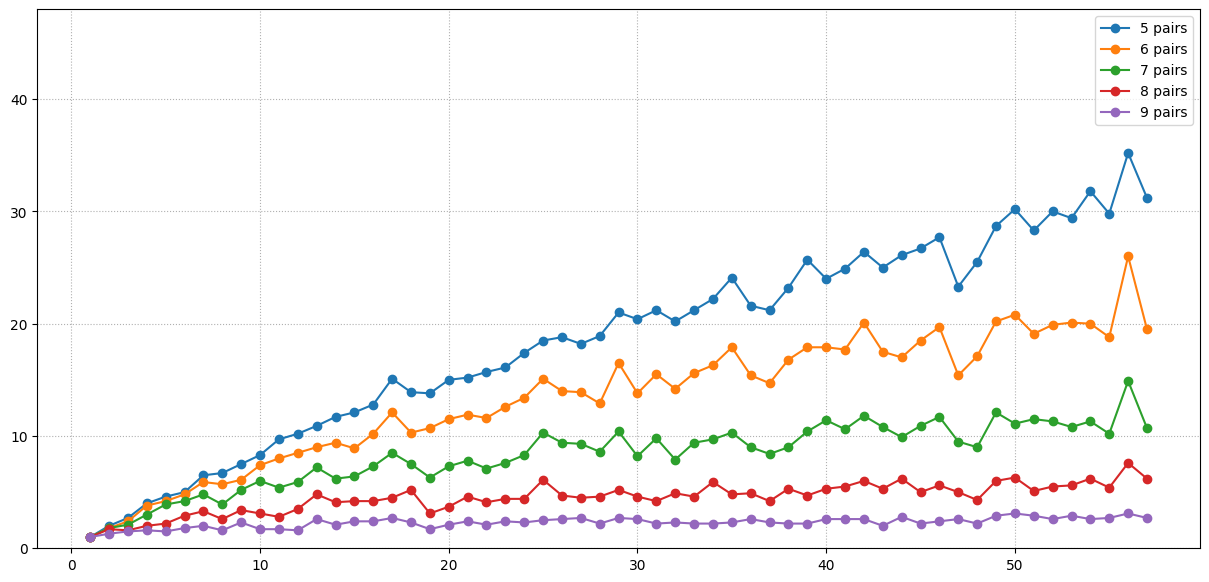

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

for i in range(5,10):
    tot = np.loadtxt(f'TotalStatics{i}.csv', delimiter=',')
    x = np.arange(1, len(tot[2])+1)
    ax.plot(x, tot[2], marker = 'o', label=f'{i} pairs')

ax.set_ylim(0, 48)
ax.legend(loc='upper right')
ax.grid(True, ls=':')


# VARIOUS NUMBER OF CLUSTERS

In [8]:
### PRODUZIONE DI CLUSTER

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform
import re
lev_dist_matrix = np.loadtxt('CLUSTERS/ClustersDict/DistMatrix.txt')
couples = np.array([])
test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']
for i in range(len(test_elements)):
    for j in range(i+1,len(test_elements)):
        couple = [test_elements[i],test_elements[j]]
        couple.sort()
        couple = ''.join(couple)
        couples = np.append(couples, couple)

condensed_dist_matrix = squareform(lev_dist_matrix)
Z = linkage(condensed_dist_matrix, method='average')
dendro = dendrogram(Z, no_plot=True)
sorted_idx = dendro['leaves']

for desired_clusters in range(8, 9):
    threshold = 0
    num_clusters = np.inf

    while num_clusters > desired_clusters:
        threshold += 0.01
        
        cluster_labels = fcluster(Z, t=threshold, criterion="distance")
        num_clusters = len(np.unique(cluster_labels)) 
    cluster_labels_sorted = cluster_labels[sorted_idx]
    couples_in_clusters = []
    unique_clusters = np.unique(cluster_labels_sorted)

    for cluster in unique_clusters:
        # Trova gli indici che appartengono a questo cluster
        cluster_indices = np.where(cluster_labels_sorted == cluster)[0]
        if len(cluster_indices) > 0:
            # Trova il primo e l'ultimo elemento del cluster per i bordi
            start, end = cluster_indices[0], cluster_indices[-1]
            cluster_size = end - start + 1
            couples_in_clusters.append((couples[sorted_idx])[start:end+1])
    new_clusters = []#[np.array([])]
    freq =[] #[0]
    for i in couples_in_clusters:
        if len(i) == 0:
            continue
        if len(i) == 1:
            new_clusters[0] = np.append(new_clusters[0],i[0])
            freq[0]+=1./105
        else:
            new_clusters.append(i)
            freq.append(float(len(i))/105)

    freq = np.array(freq)
    freqsorted_idx = np.argsort(freq)
    freq = freq[freqsorted_idx]
    new_clusters = [new_clusters[i].tolist() for i in freqsorted_idx]
    for idx, cluster in enumerate(new_clusters):
        new_clusters[idx] = [re.findall(r'[A-Z][^A-Z]*', j) for j in cluster]

    clusters = {}
    for i in range(len(freq)):
        clusters[f'{i}'] = {
            'couples' : new_clusters[i],
            'freq' : freq[i]
        }
    import json
    with open(f'CLUSTERS/ClustersDict/Clusters{desired_clusters}.json', 'w') as f:
        json.dump(clusters, f, indent=4)

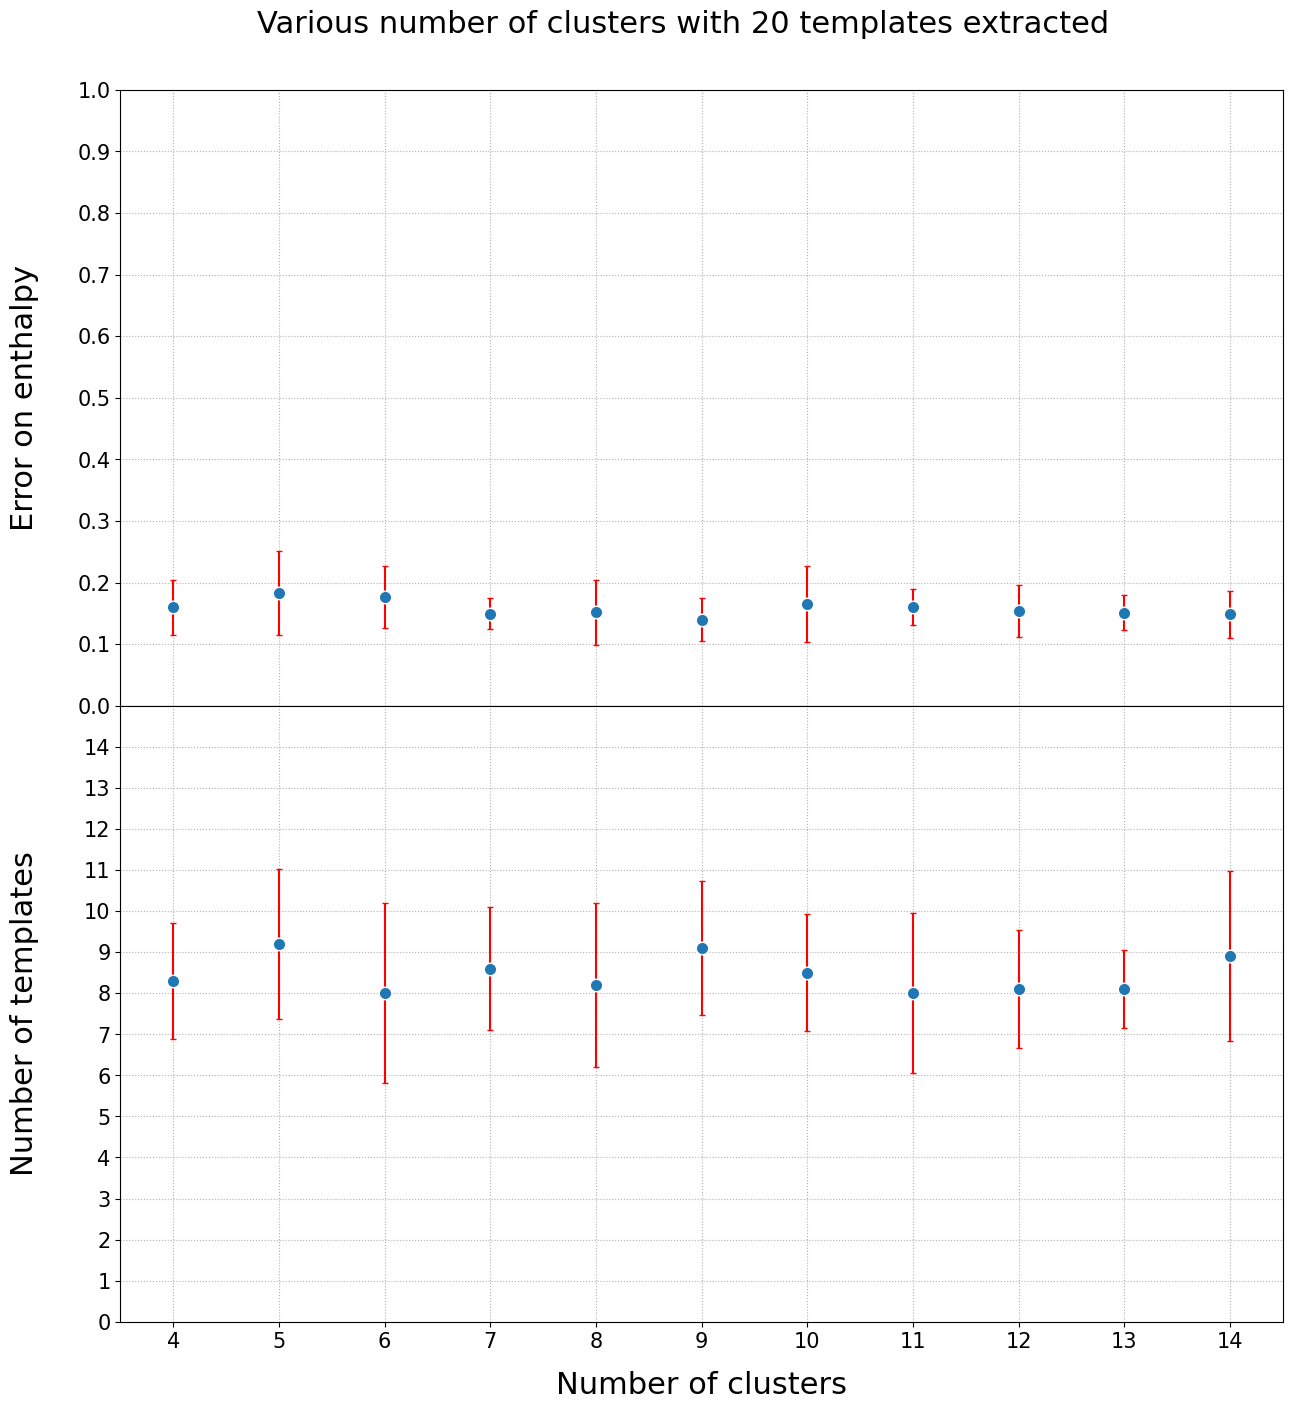

In [ ]:
# DURING THE PRODUCTION OF TEMPLATES, THE METHOD OF CLUSTERS HAS BEEN USED
import numpy as np
import matplotlib.pyplot as plt

fig, (ax,ax1) = plt.subplots(2,1,figsize=(15, 16), sharex=True)
fig.subplots_adjust(hspace=0.0)
fig.suptitle('Various number of clusters with 20 templates extracted', fontsize=22, y=0.93)

a = np.loadtxt('CLUSTERS/ClusterAnalisDATA/TRENDS_Extraction.txt')
x = np.arange(4, 15)

ax.errorbar(x, a[0], yerr=a[1], fmt='o', label='Energy', markersize = 9, ecolor='red', capsize=2, markeredgecolor='white')

ax.set_ylim(0, 1)

ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels(np.round(np.arange(0, 1.1, 0.1), decimals=1), fontsize=15)
ax.set_ylabel('Error on enthalpy', fontsize=22)
ax.axes.yaxis.set_label_coords(-0.07, 0.5)

ax.grid(True, ls=':')

ax1.errorbar(x, a[2], yerr=a[3], fmt='o', label='Energy', markersize = 9, ecolor='red', capsize=2, markeredgecolor='white')

ax1.set_ylim(0, 15)
ax1.set_xlim(3.5, 14.5)

ax1.set_xticks(x)
ax1.set_xticklabels(x, fontsize=15)
ax1.set_xlabel('Number of clusters', fontsize=22)
ax1.xaxis.set_label_coords(0.5, -0.08)

ax1.set_yticks(np.arange(0, 15, 1))
ax1.set_yticklabels(np.arange(0, 15, 1), fontsize=15)
ax1.set_ylabel('Number of templates', fontsize=22)
ax1.axes.yaxis.set_label_coords(-0.07, 0.5)

ax1.grid(True, ls=':')

plt.show()

In [6]:
import json
import numpy as np
from tqdm import tqdm
from template_csp import managetemp as mte
import os
hyperparameters = {
    'ntemp_start' : 1,
    'ntemp_end' : 58,

    'comp' : 1,
    'lev_gen' : 0.8,
    'n_sets' : 10,
    'n_template' : 20,

    'id_set' : 1,
    'lev_red' : 0.9,
    'weight_formation_entalphy' : 1,
    'weight_occurrence' : 1,
    'weight_sg' : 0.001,

    'n_pairs' : 105,
    
}
test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']


dif_vec = np.zeros((4, 27)) 

for i in tqdm(range(27)):
    with open(f'CLUSTERS/ClustersDict/Clusters{i+4}.json', 'r') as f:
        clusters = json.load(f)

    errors = np.zeros(hyperparameters['n_sets'])
    tempafter = np.zeros(hyperparameters['n_sets'])

    hyperparameters['n_pairs'] = i+4

    for k in range(hyperparameters['n_sets']):
        # template_set = mte.TemplateSet(test_elements, f'CLUSTERS/CLUSTER METHOD/{hyperparameters["n_template"]}/TemplateSet_{k}')
        template_set = mte.generate_one_templateset(hyperparameters, test_elements, clusters)
        os.makedirs(f'CLUSTERS/BOTH/{hyperparameters["n_pairs"]}', exist_ok=True)
        template_set.recap_tempset(f'CLUSTERS/BOTH/{hyperparameters["n_pairs"]}/TemplateSet_{k}')

        reduction_set = mte.generate_one_pairset(template_set, hyperparameters, test_elements, clusters)
        reduction_set.recap_relaxed(f'CLUSTERS/BOTH/{hyperparameters["n_pairs"]}/Pairset_{k}')
        errors[k] = reduction_set.total_error(hyperparameters)
        tempafter[k] = len(reduction_set.reduced_set(hyperparameters))
    
    dif_vec[0][i] = errors.mean()
    dif_vec[1][i] = errors.std()
    dif_vec[2][i] = tempafter.mean()
    dif_vec[3][i] = tempafter.std()

    np.savetxt('CLUSTERS/ClusterAnalisDATA/TRENDS_Production_Reduction.txt', dif_vec)



100%|██████████| 27/27 [56:57<00:00, 126.57s/it] 


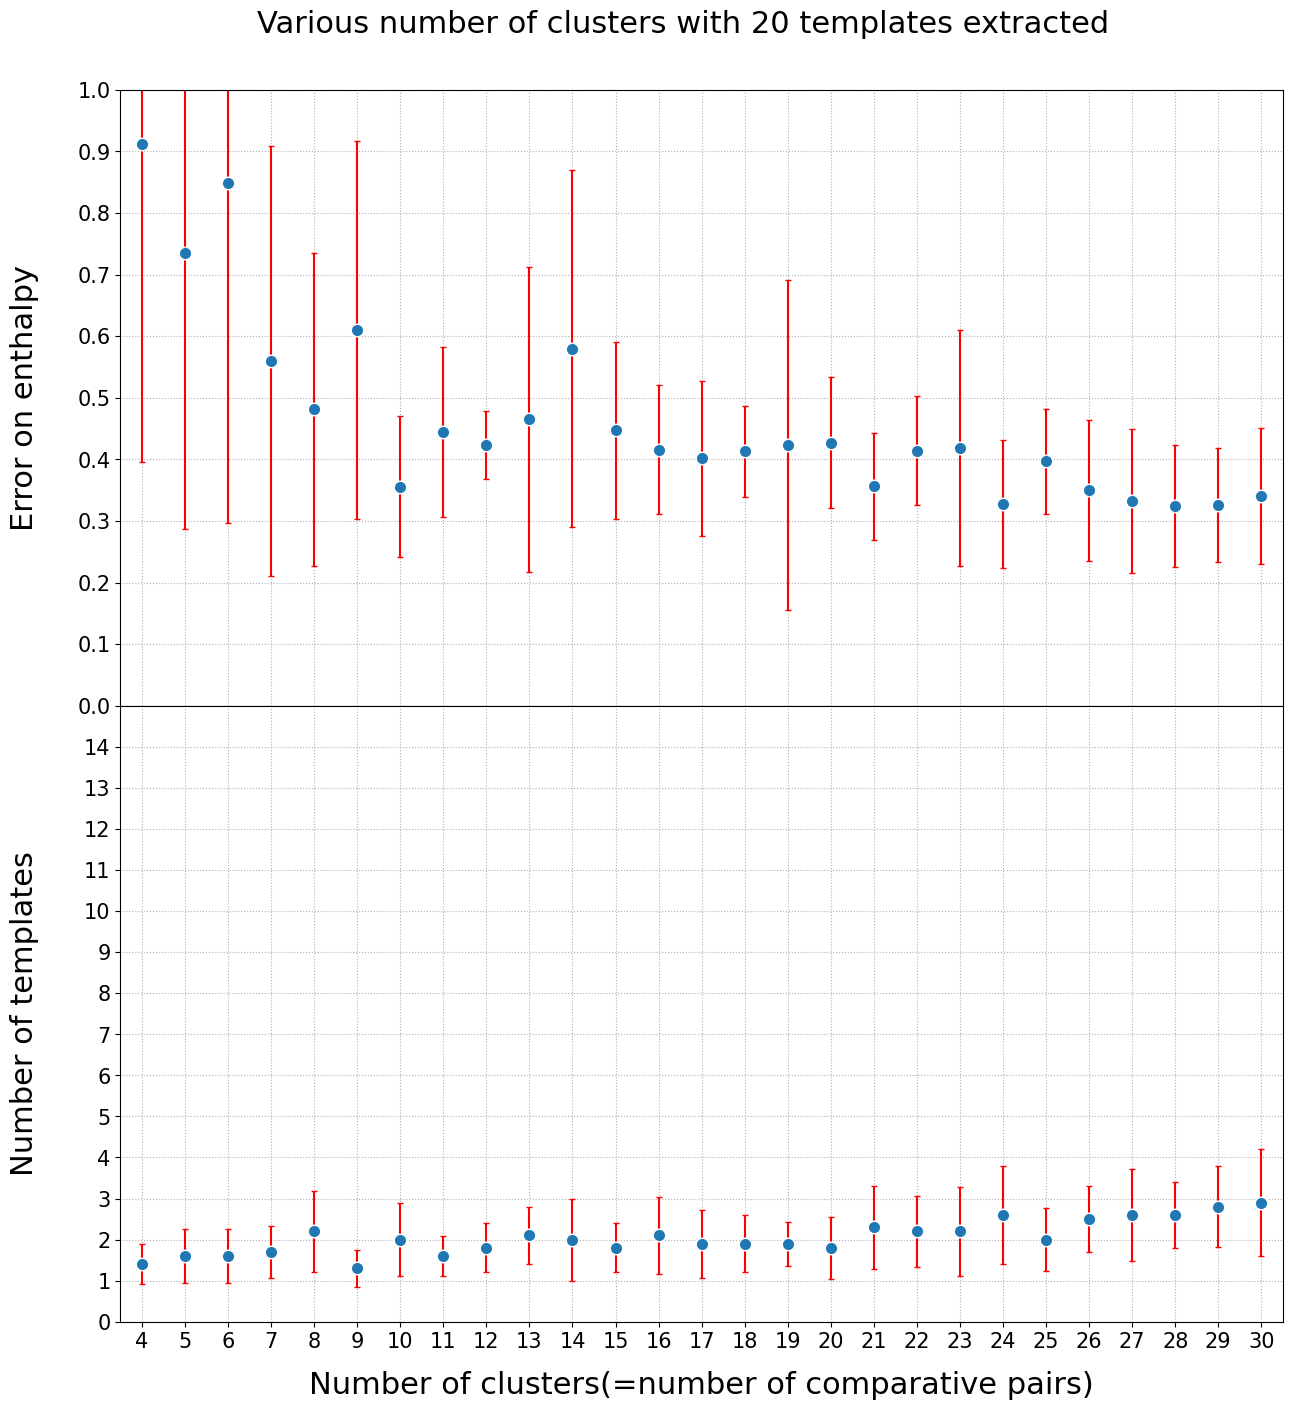

In [ ]:
# DURING THE REDUCTION OF TEMPLATES, THE METHOD OF CLUSTERS HAS BEEN USED
import numpy as np
import matplotlib.pyplot as plt

fig, (ax,ax1) = plt.subplots(2,1,figsize=(15, 16), sharex=True)
fig.subplots_adjust(hspace=0.0)
fig.suptitle('Various number of clusters with 20 templates extracted', fontsize=22, y=0.93)

a = np.loadtxt('CLUSTERS/ClusterAnalisDATA/TRENDS_Reduction.txt')
x = np.arange(4, 31)

ax.errorbar(x, a[0], yerr=a[1], fmt='o', label='Energy', markersize = 9, ecolor='red', capsize=2, markeredgecolor='white')

ax.set_ylim(0, 1)

ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels(np.round(np.arange(0, 1.1, 0.1), decimals=1), fontsize=15)
ax.set_ylabel('Error on enthalpy', fontsize=22)
ax.axes.yaxis.set_label_coords(-0.07, 0.5)

ax.grid(True, ls=':')

ax1.errorbar(x, a[2], yerr=a[3], fmt='o', label='Energy', markersize = 9, ecolor='red', capsize=2, markeredgecolor='white')

ax1.set_ylim(0, 15)
ax1.set_xlim(3.5, 30.5)

ax1.set_xticks(x)
ax1.set_xticklabels(x, fontsize=15)
ax1.set_xlabel('Number of clusters (=number of comparative pairs)', fontsize=22)
ax1.xaxis.set_label_coords(0.5, -0.08)

ax1.set_yticks(np.arange(0, 15, 1))
ax1.set_yticklabels(np.arange(0, 15, 1), fontsize=15)
ax1.set_ylabel('Number of templates', fontsize=22)
ax1.axes.yaxis.set_label_coords(-0.07, 0.5)

ax1.grid(True, ls=':')

plt.show()

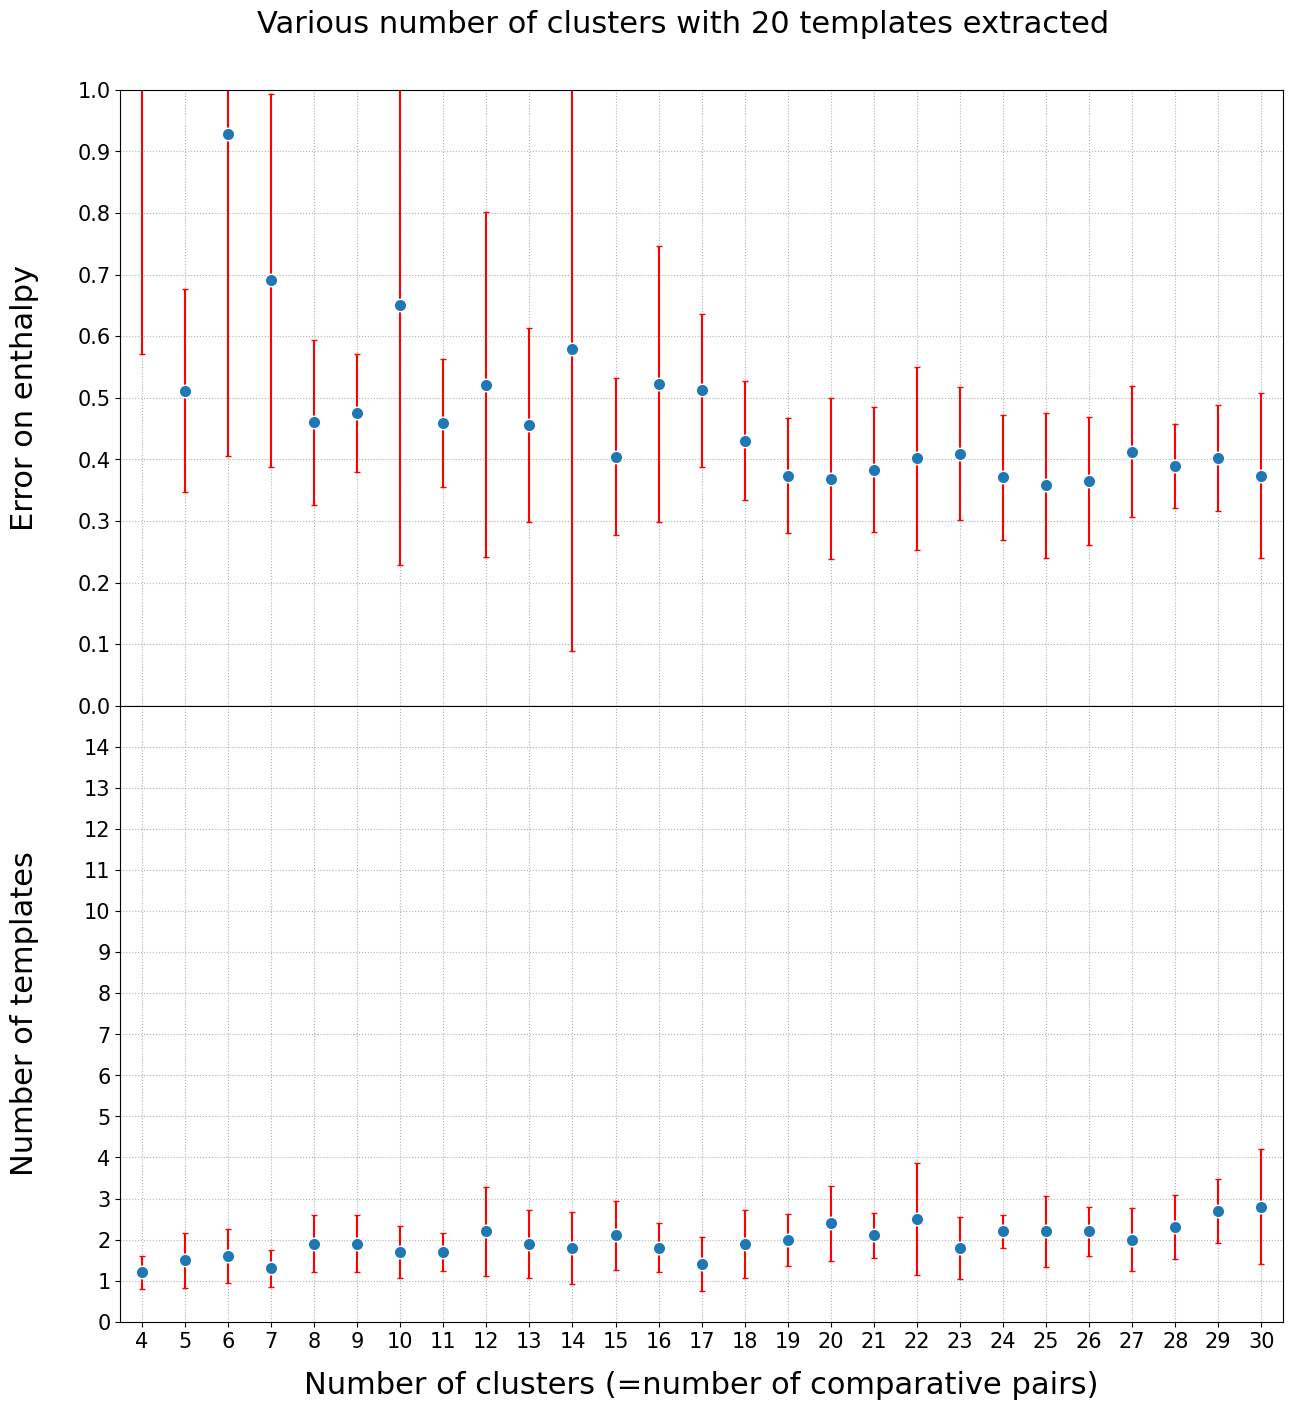

In [7]:
# DURING THE REDUCTION and production OF TEMPLATES, THE METHOD OF CLUSTERS HAS BEEN USED
import numpy as np
import matplotlib.pyplot as plt

fig, (ax,ax1) = plt.subplots(2,1,figsize=(15, 16), sharex=True)
fig.subplots_adjust(hspace=0.0)
fig.suptitle('Various number of clusters with 20 templates extracted', fontsize=22, y=0.93)

a = np.loadtxt('CLUSTERS/ClusterAnalisDATA/TRENDS_Production_Reduction.txt')
x = np.arange(4, 31)

ax.errorbar(x, a[0], yerr=a[1], fmt='o', label='Energy', markersize = 9, ecolor='red', capsize=2, markeredgecolor='white')

ax.set_ylim(0, 1)

ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels(np.round(np.arange(0, 1.1, 0.1), decimals=1), fontsize=15)
ax.set_ylabel('Error on enthalpy', fontsize=22)
ax.axes.yaxis.set_label_coords(-0.07, 0.5)

ax.grid(True, ls=':')

ax1.errorbar(x, a[2], yerr=a[3], fmt='o', label='Energy', markersize = 9, ecolor='red', capsize=2, markeredgecolor='white')

ax1.set_ylim(0, 15)
ax1.set_xlim(3.5, 30.5)

ax1.set_xticks(x)
ax1.set_xticklabels(x, fontsize=15)
ax1.set_xlabel('Number of clusters (=number of comparative pairs)', fontsize=22)
ax1.xaxis.set_label_coords(0.5, -0.08)

ax1.set_yticks(np.arange(0, 15, 1))
ax1.set_yticklabels(np.arange(0, 15, 1), fontsize=15)
ax1.set_ylabel('Number of templates', fontsize=22)
ax1.axes.yaxis.set_label_coords(-0.07, 0.5)

ax1.grid(True, ls=':')

plt.show()

In [ ]:
# DURING THE REDUCTION and production OF TEMPLATES, THE METHOD OF CLUSTERS HAS BEEN USED
import numpy as np
import matplotlib.pyplot as plt

fig, (ax,ax1) = plt.subplots(2,1,figsize=(15, 16), sharex=True)
fig.subplots_adjust(hspace=0.0)
fig.suptitle('Various number of clusters with 20 templates extracted', fontsize=22, y=0.93)

a = np.loadtxt('CLUSTERS/ClusterAnalisDATA/TRENDS_Production_Reduction.txt')
x = np.arange(4, 31)

ax.errorbar(x, a[0], yerr=a[1], fmt='o', label='Energy', markersize = 9, ecolor='red', capsize=2, markeredgecolor='white')

ax.set_ylim(0, 1)

ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels(np.round(np.arange(0, 1.1, 0.1), decimals=1), fontsize=15)
ax.set_ylabel('Error on enthalpy', fontsize=22)
ax.axes.yaxis.set_label_coords(-0.07, 0.5)

ax.grid(True, ls=':')

ax1.errorbar(x, a[2], yerr=a[3], fmt='o', label='Energy', markersize = 9, ecolor='red', capsize=2, markeredgecolor='white')

ax1.set_ylim(0, 15)
ax1.set_xlim(3.5, 30.5)

ax1.set_xticks(x)
ax1.set_xticklabels(x, fontsize=15)
ax1.set_xlabel('Number of clusters (=number of comparative pairs)', fontsize=22)
ax1.xaxis.set_label_coords(0.5, -0.08)

ax1.set_yticks(np.arange(0, 15, 1))
ax1.set_yticklabels(np.arange(0, 15, 1), fontsize=15)
ax1.set_ylabel('Number of templates', fontsize=22)
ax1.axes.yaxis.set_label_coords(-0.07, 0.5)

ax1.grid(True, ls=':')

plt.show()